In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
train_master = pd.read_csv("train.csv", index_col=0)
train_master.head(3)

,text,genre
id,,
0,. SOBOZINSKI It's just insurance. ROTTOVICH Th...,thriller
1,"k, Mr. McCulloch, I got in a car accident yest...",horror
2,"o take her home, you know what I mean? I'd be ...",drama


In [74]:
test_master = pd.read_csv("test.csv", index_col=0)
test_master.head(3)

,text
id,
3,"are four people. A man climbs out, starts to ..."
5,arteries and blue colored veins form such an ...
12,toy guns. This is Man's Boredom. A ceiling fan...


drama        0.498484
thriller     0.249112
comedy       0.107571
action       0.088265
sci-fi       0.022875
horror       0.015996
other        0.009967
adventure    0.005104
romance      0.002626
Name: genre, dtype: float64


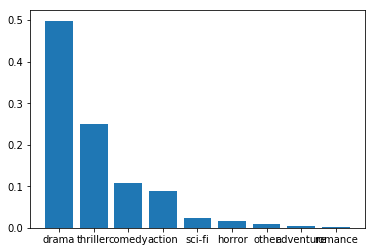

In [75]:
value_counts = train_master['genre'].value_counts(normalize=True)
print(value_counts)
plt.bar(value_counts.index, value_counts)
plt.show()

In [76]:
def model(text):
    words = text.split()
    if words.count('laugh') > 2:
        return 'comedy'
    else:
        return 'drama'

In [77]:
predictions = train_master['text'].apply(model)

In [78]:
def score_accuracy(actuals, predictions):
    correct = 0
    for x, y in zip(actuals, predictions):
        if x == y:
            correct += 1
    return correct / len(actuals)

In [79]:
score_accuracy(train_master['genre'], predictions)

0.4985021081440935

In [80]:
test_master['genre'] = test_master['text'].apply(model)
test_master.head()

,text,genre
id,,
3,"are four people. A man climbs out, starts to ...",drama
5,arteries and blue colored veins form such an ...,drama
12,toy guns. This is Man's Boredom. A ceiling fan...,drama
17,effrey slowly climbs the stairs. His shoes squ...,drama
18,up towards the sky. HEAD ELF CONT'D There's Sa...,drama


In [81]:
test_master.drop(columns=['text']).to_csv('sample_submission.csv')